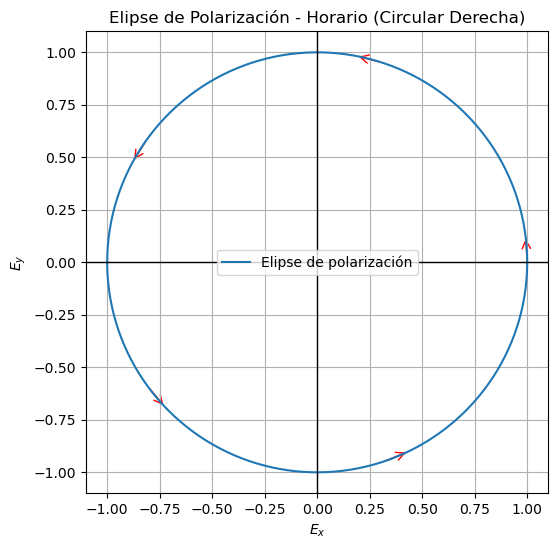

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

def plot_polarization_ellipse(E):
    # Extraer componentes del vector de Jones
    Ex, Ey = E[0, 0], E[1, 0]
    
    # Parámetros de la onda
    t = np.linspace(0, 2 * np.pi, 500)
    
    # Componentes del campo eléctrico
    E_x = np.real(Ex * np.exp(1j * t))
    E_y = np.real(Ey * np.exp(1j * t))

    # Graficar la elipse de polarización
    plt.figure(figsize=(6, 6))
    plt.plot(E_x, E_y, label='Elipse de polarización')

    # Determinar sentido de giro (horario o antihorario)
    delta_phase = np.angle(Ey) - np.angle(Ex)
    sentido = 'Antihorario (Circular Izquierda)' if delta_phase > 0 else 'Horario (Circular Derecha)'

    # Flecha en la trayectoria de la elipse
    for i in range(0, len(t), 100):
        arrow = FancyArrowPatch((E_x[i], E_y[i]), (E_x[i+10], E_y[i+10]),
                                arrowstyle='->', color='red', mutation_scale=15)
        plt.gca().add_patch(arrow)

    plt.axhline(0, color='k', linewidth=1)
    plt.axvline(0, color='k', linewidth=1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f'Elipse de Polarización - {sentido}')
    plt.xlabel('$E_x$')
    plt.ylabel('$E_y$')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo con el vector de Jones Es = np.array([[1], [2*np.exp(1j*np.pi)]])
Es = np.array([[1], [-1j]])
plot_polarization_ellipse(Es)
